**Ames** is a city in Story County, Iowa, United States, located approximately 30 miles north of Des Moines in central Iowa. It is best known as the home of Iowa State University, with leading agriculture, design, engineering, and veterinary medicine colleges.

Our project will explore the Ames, Iowa housing dataset with a goal to approximate the sale price of houses dependent on different features of the house.

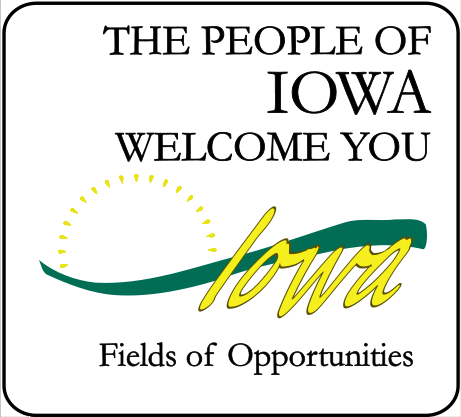

*First, let us import the libraries we will need and read our dataset in.*

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression as LR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from xgboost import XGBRegressor as XGBR

In [ ]:
data =  pd.read_csv("https://raw.githubusercontent.com/MarkosMEYT/csci200/main/ames.csv")

# **STEP 1) EDA**
 In this step we will begin to explore our data in order to make informed decisions in the next steps. Let us begin by taking a peek at our dataset 👀




In [ ]:
data.head(n=10)

,Unnamed: 0,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,1,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,...,No_Fence,NaN,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,2,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,...,Minimum_Privacy,NaN,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,4,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,...,No_Fence,NaN,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,5,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,...,Minimum_Privacy,NaN,0,3,2010,WD,Normal,189900,-93.638933,42.060899
5,6,Two_Story_1946_and_Newer,Residential_Low_Density,78,9978,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,...,No_Fence,NaN,0,6,2010,WD,Normal,195500,-93.638925,42.060779
6,7,One_Story_PUD_1946_and_Newer,Residential_Low_Density,41,4920,Pave,No_Alley_Access,Regular,Lvl,AllPub,...,No_Fence,NaN,0,4,2010,WD,Normal,213500,-93.633792,42.062978
7,8,One_Story_PUD_1946_and_Newer,Residential_Low_Density,43,5005,Pave,No_Alley_Access,Slightly_Irregular,HLS,AllPub,...,No_Fence,NaN,0,1,2010,WD,Normal,191500,-93.633826,42.060728
8,9,One_Story_PUD_1946_and_Newer,Residential_Low_Density,39,5389,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,...,No_Fence,NaN,0,3,2010,WD,Normal,236500,-93.632852,42.061120
9,10,Two_Story_1946_and_Newer,Residential_Low_Density,60,7500,Pave,No_Alley_Access,Regular,Lvl,AllPub,...,No_Fence,NaN,0,6,2010,WD,Normal,189000,-93.639068,42.059193


Awesome! Now let us see some summary statistics for our numerical variables.

In [ ]:
numerical_features = ["Year_Built","Year_Sold", "First_Flr_SF", "Second_Flr_SF", "Total_Bsmt_SF",
                      "Bsmt_Unf_SF", "Sale_Price", "Open_Porch_SF", "Enclosed_Porch",
                      "Screen_Porch"]

numerical_data = data[numerical_features]

summary_stats = numerical_data.describe()
print(summary_stats)

        Year_Built    Year_Sold  First_Flr_SF  Second_Flr_SF  Total_Bsmt_SF  \
count  2930.000000  2930.000000   2930.000000    2930.000000    2930.000000   
mean   1971.356314  2007.790444   1159.557679     335.455973    1051.255631   
std      30.245361     1.316613    391.890885     428.395715     440.968018   
min    1872.000000  2006.000000    334.000000       0.000000       0.000000   
25%    1954.000000  2007.000000    876.250000       0.000000     793.000000   
50%    1973.000000  2008.000000   1084.000000       0.000000     990.000000   
75%    2001.000000  2009.000000   1384.000000     703.750000    1301.500000   
max    2010.000000  2010.000000   5095.000000    2065.000000    6110.000000   

       Bsmt_Unf_SF     Sale_Price  Open_Porch_SF  Enclosed_Porch  Screen_Porch  
count  2930.000000    2930.000000    2930.000000     2930.000000   2930.000000  
mean    559.071672  180796.060068      47.533447       23.011604     16.002048  
std     439.540571   79886.692357      67.483

Great! Let us see what are the highlights:

*   **'Year_Built'**: the dataset consists of 2930 observations with a mean year of construction of 1971.

* '**Year_Sold'** also has 2930 observations, with the mean year of sale being 2007.


* **'First_Flr_SF'**, mean area of approximately 1159 square feet. The area ranges from 334 to 5095 square feet.

* 'Second_Flr_SF', mean area of about 335 sq ft.

* 'Total_Bsmt_SF' mean area of approximately 1051 square feet. The area ranges from 0 to 6110 square feet.

* 'Bsmt_Unf_SF' mean area of around 559 square feet. The area ranges from 0 to 2336 square feet.
* 'Sale_Price', mean sale price of approximately 180,796 dollars, and range from 12,789 dollars
to 755,000 dollars, with a standard deviation of about $79,886.

* 'Open_Porch_SF' mean area of approximately 47.53 square feet. The area ranges from 0 to 742 square feet

* 'Enclosed_Porch', mean area of about 23.01 square feet. The area ranges from 0 to 1012 square feet.

* 'Screen_Porch' has 2930 observations, with a mean area of approximately 16 square feet.


# Now let us see some EDA for our categorical variables! We will focus on the most relevant ones and exclude ones such as longtitude, latitude, and specific design styles that are not distinctive.

In [ ]:
most_populous_neighborhoods = data['Neighborhood'].value_counts().nlargest(5)
print("Most Populous Neighborhoods:")
print(most_populous_neighborhoods)

Most Populous Neighborhoods:
Neighborhood
North_Ames       443
College_Creek    267
Old_Town         239
Edwards          194
Somerset         182
Name: count, dtype: int64


In [ ]:
most_common_years_sold = data['Year_Sold'].value_counts().nlargest(3)

for year, count in most_common_years_sold.items():
    print(f"Year: {year}, Number of Houses Sold: {count}")

Year: 2007, Number of Houses Sold: 694
Year: 2009, Number of Houses Sold: 648
Year: 2006, Number of Houses Sold: 625


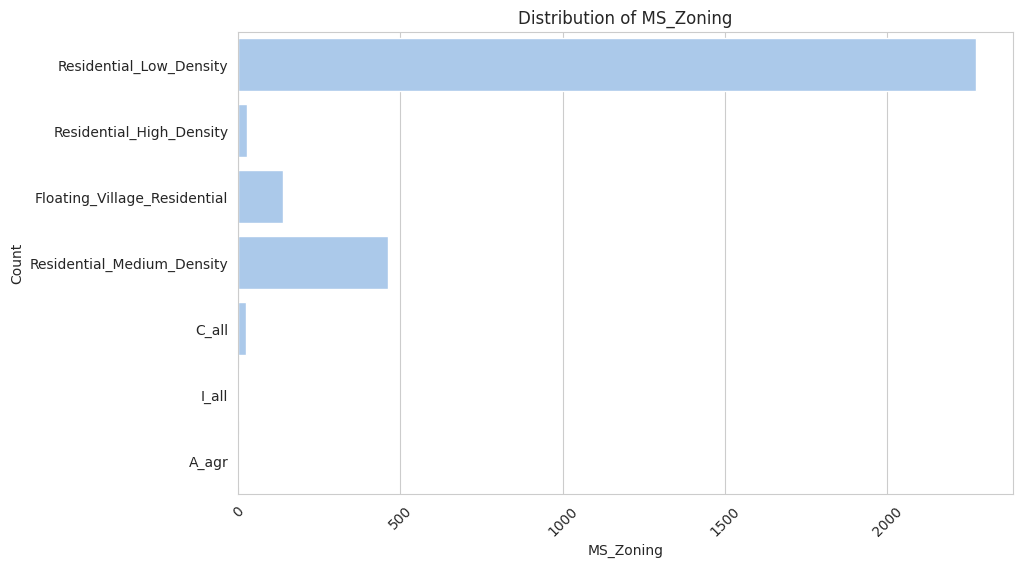

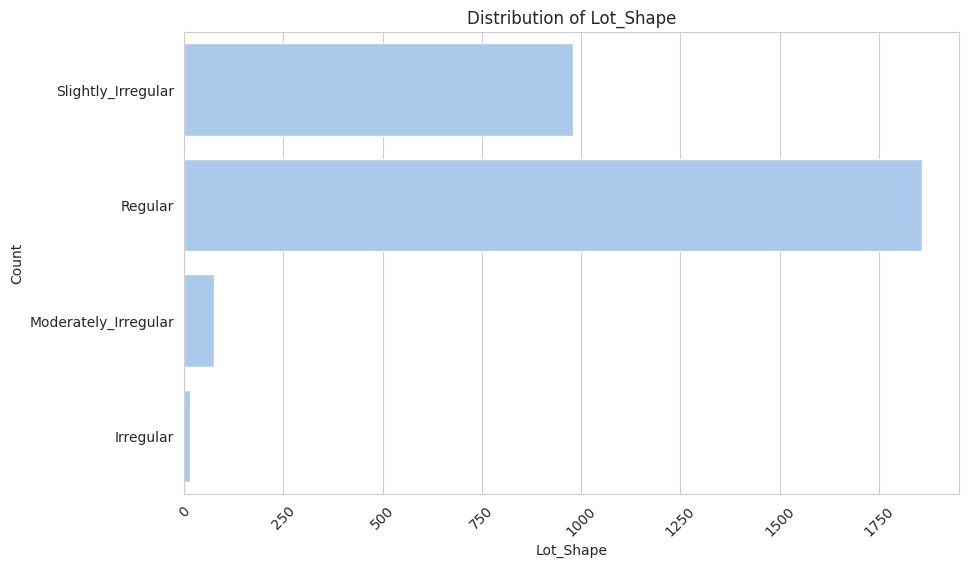

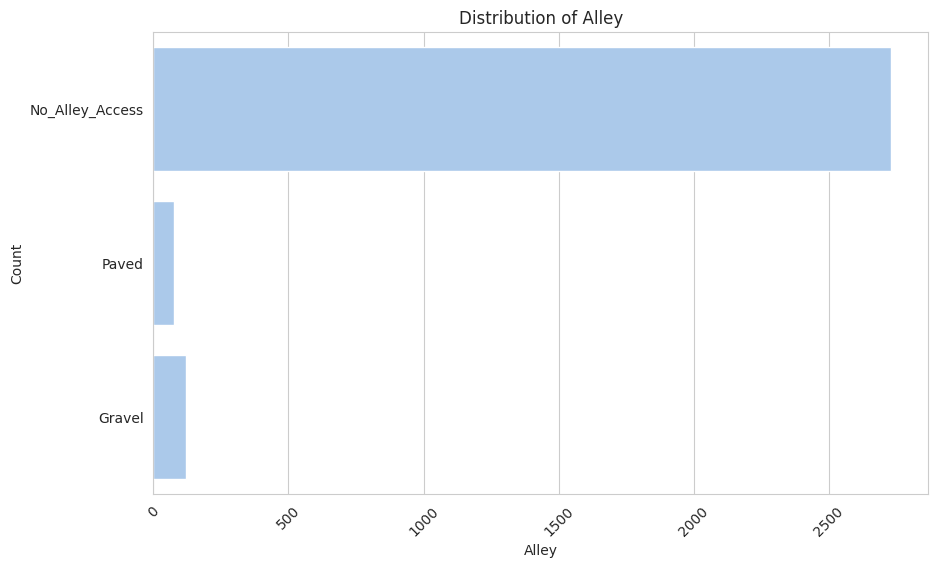

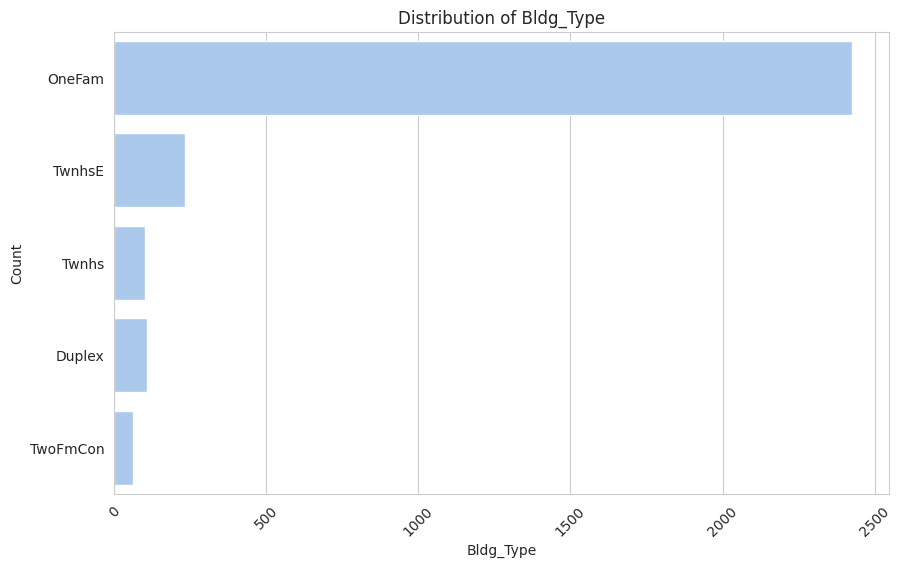

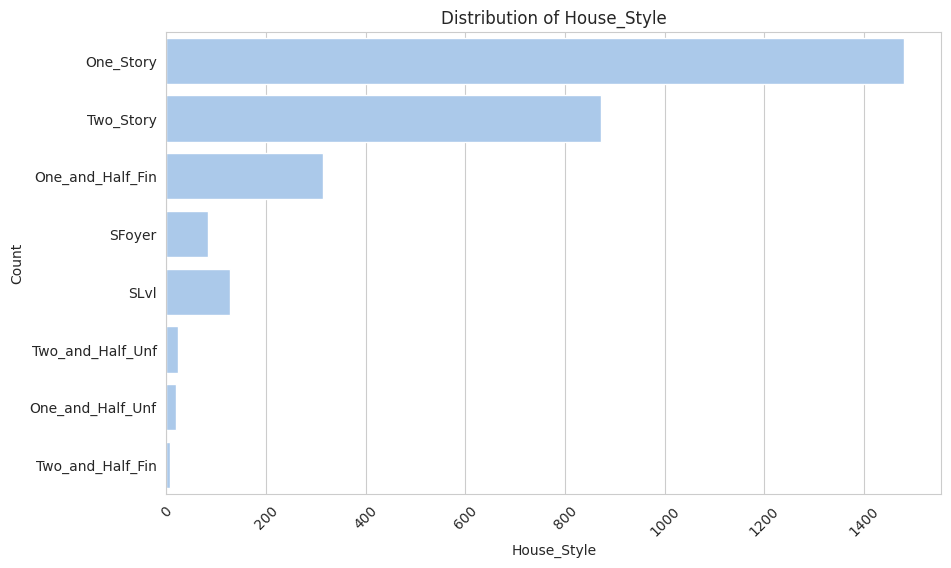

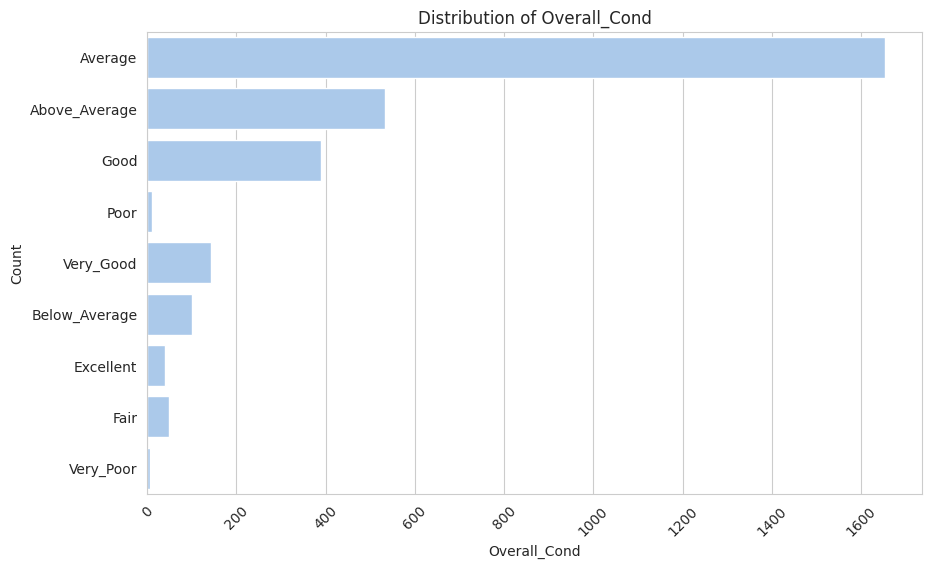

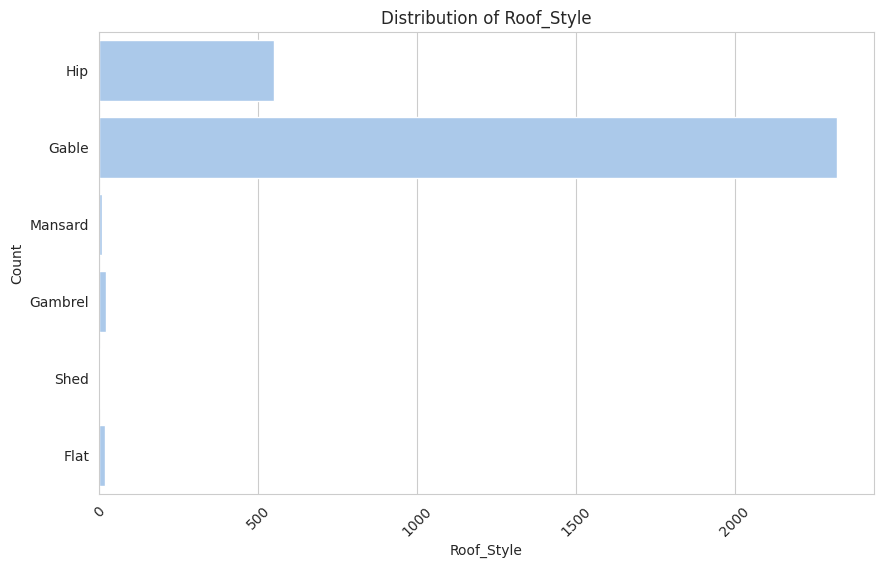

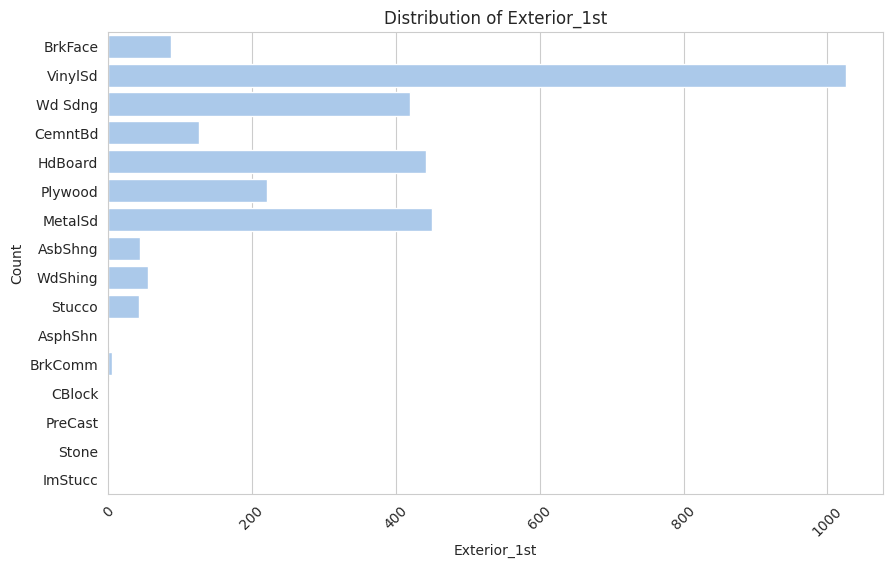

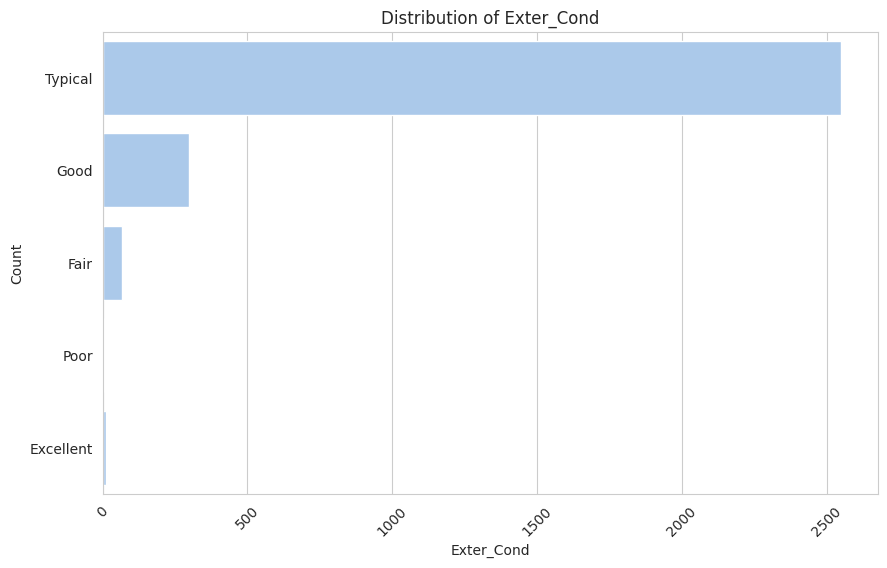

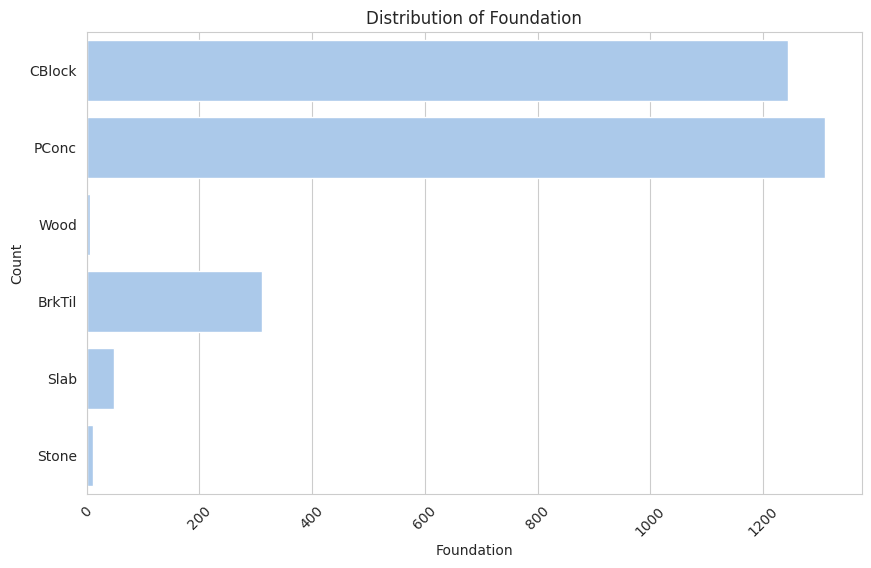

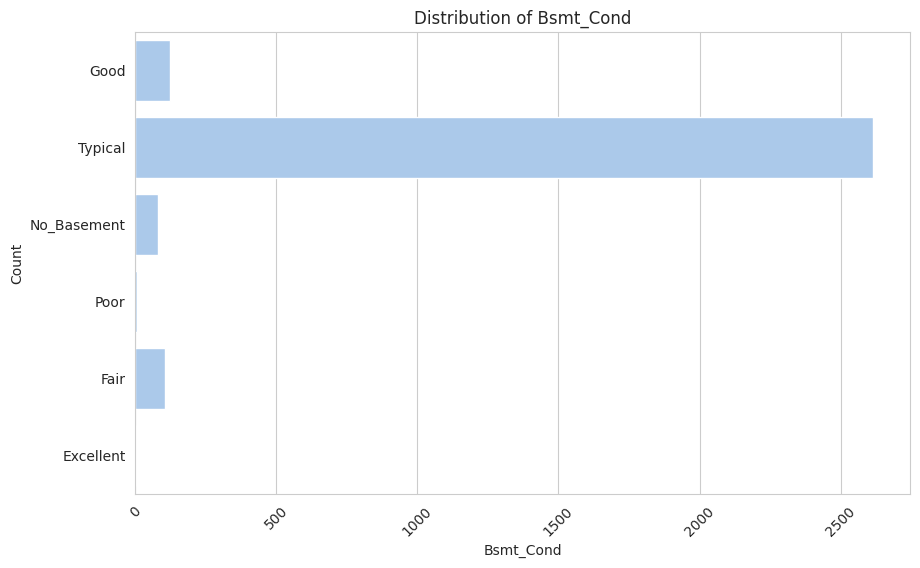

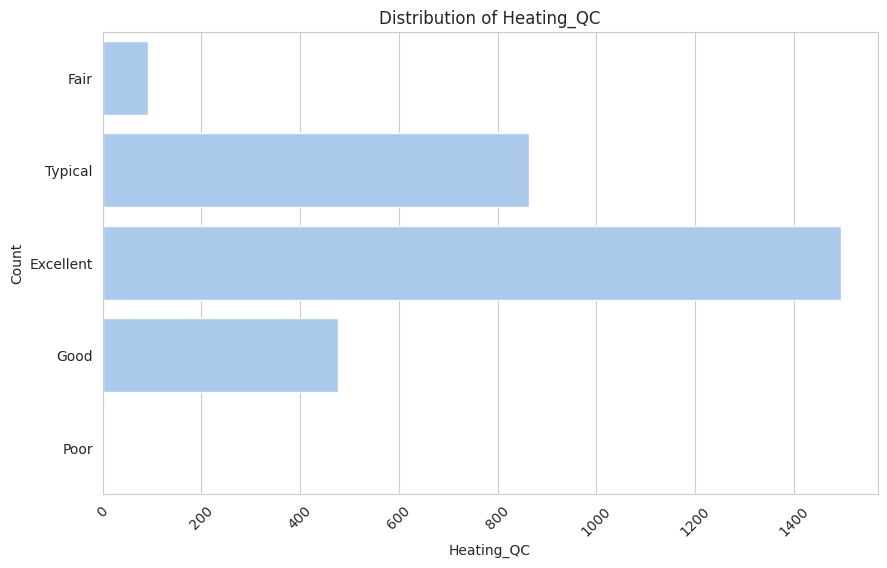

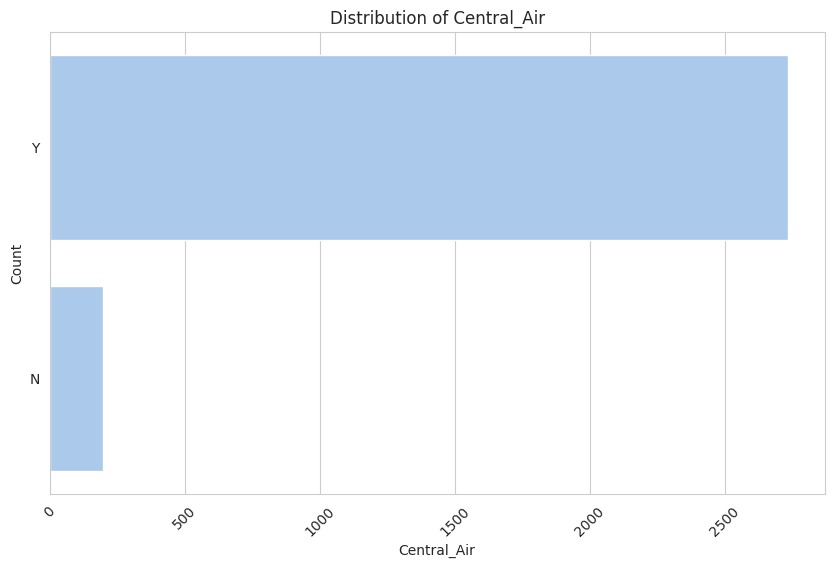

In [ ]:
relevant_cat = ['MS_Zoning', 'Lot_Shape', 'Alley', 'Bldg_Type',
                                  'House_Style', 'Overall_Cond', 'Roof_Style',
                                  'Exterior_1st', 'Exter_Cond', 'Foundation',
                                  'Bsmt_Cond', 'Heating_QC', 'Central_Air']

# Loop through each specific categorical feature and create a bar plot
for feature in relevant_cat:
    plt.figure(figsize=(10, 6))
    sns.countplot(data[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

That is a lot of helpful information! Let us focus on some more specific visualization such as Sale_Price in relation to neighborhoods, how many houses are sold for what prices, sale prices and house condition, and more!

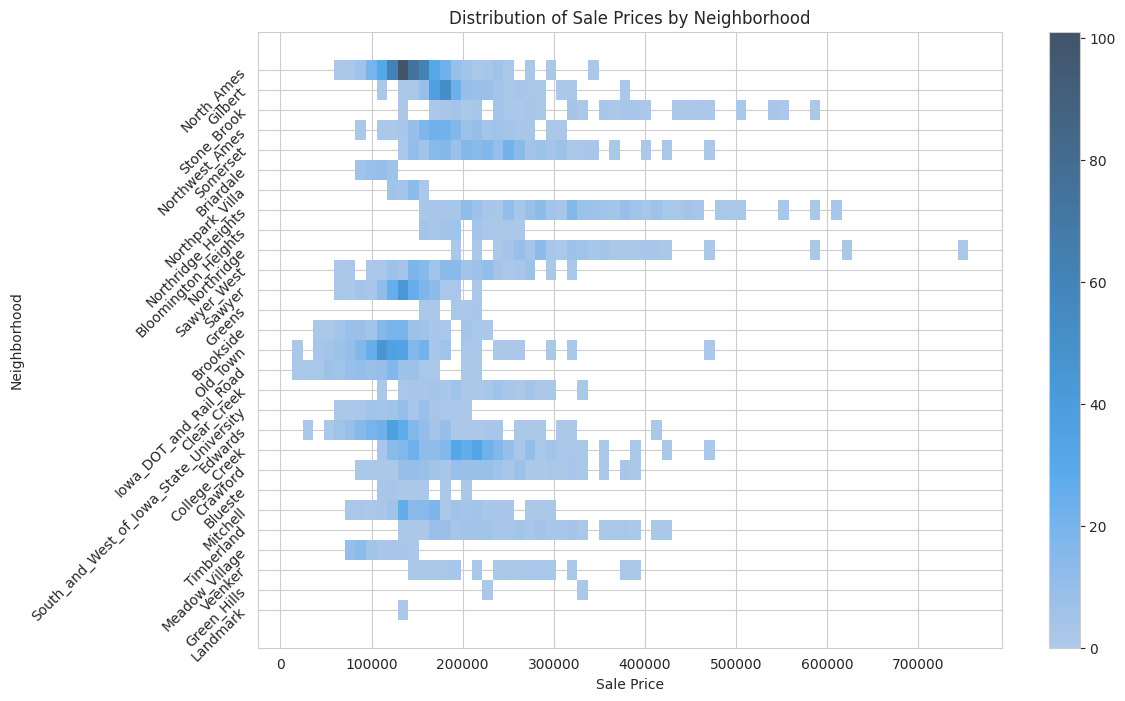

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.set_palette("pastel")

sns.histplot(x=data['Sale_Price'], y=data['Neighborhood'], ax=ax, cbar=True)

ax.set_xlabel('Sale Price')
ax.set_ylabel('Neighborhood')
ax.set_title('Distribution of Sale Prices by Neighborhood')

plt.yticks(rotation=45)

plt.show()

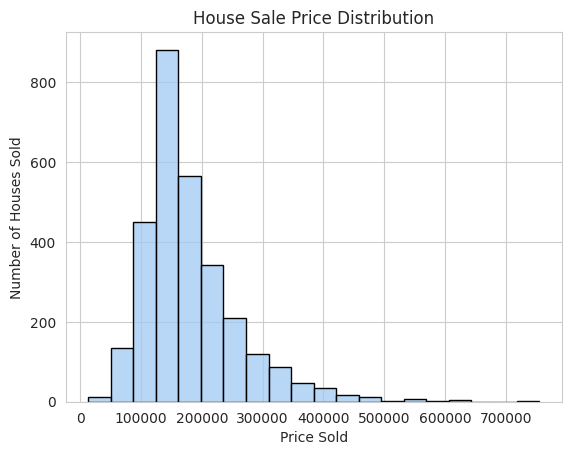

In [ ]:
sns.set_style("whitegrid")

sns.histplot(x=data['Sale_Price'], bins=20, edgecolor="black")

plt.xlabel("Price Sold")
plt.ylabel("Number of Houses Sold")
plt.title("House Sale Price Distribution")
plt.show()

In [ ]:
fig = px.scatter(data, x='Lot_Area', y='Sale_Price', trendline='ols',
                 title='Sale Price vs Overall Condition')

fig.update_layout(
    title_x=0.5,
    xaxis_title=' Area',
    yaxis_title='Sale Price',
    width=800,
    height=600,
)

fig.show()

Awesome! Let us take a closer look at our variables, from our neighborhood distribution plot we saw that the most populated neighborhoods with houses and sales are North Ames, Old Town, and College Creek. We also have two variables: Year_Sold and Year_Built. Let us combine year sold and built to **feature engineer** "Age"! Then, let's take a look at the top 3 neighborhoods.

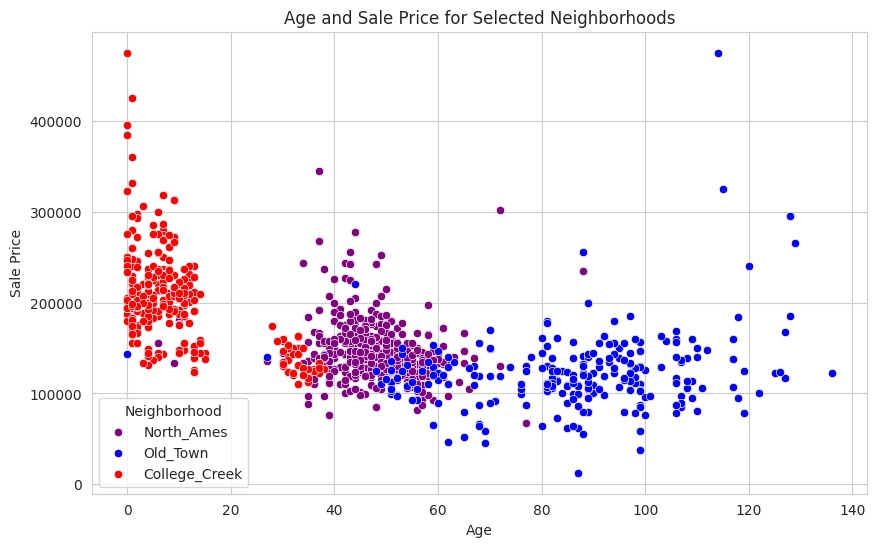

In [ ]:
data['Age'] = data['Year_Sold'] - data['Year_Built']


# top 3 neighborhoods

selected_neighborhoods = ['North_Ames', 'Old_Town', 'College_Creek']
colors = {'North_Ames': 'purple', 'Old_Town': 'blue', 'College_Creek': 'red'}


filtered_data2 = data[data['Neighborhood'].isin(selected_neighborhoods)]

plt.figure(figsize=(10, 6))
for neighborhood, color in colors.items():
    sub = filtered_data2[filtered_data2['Neighborhood'] == neighborhood]
    sns.scatterplot(x='Age', y='Sale_Price', data=sub, color=color, label=neighborhood)

plt.title('Age and Sale Price for Selected Neighborhoods')
plt.xlabel('Age')
plt.ylabel('Sale Price')
plt.legend(title='Neighborhood')
plt.show()

Good! We see that the houses that "live" the youngest and are sold for the highest are in College Creek, with some research we find out that the reason for that is because College Creek is a campus town.

<ipython-input-83-53fc3a2443cf>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




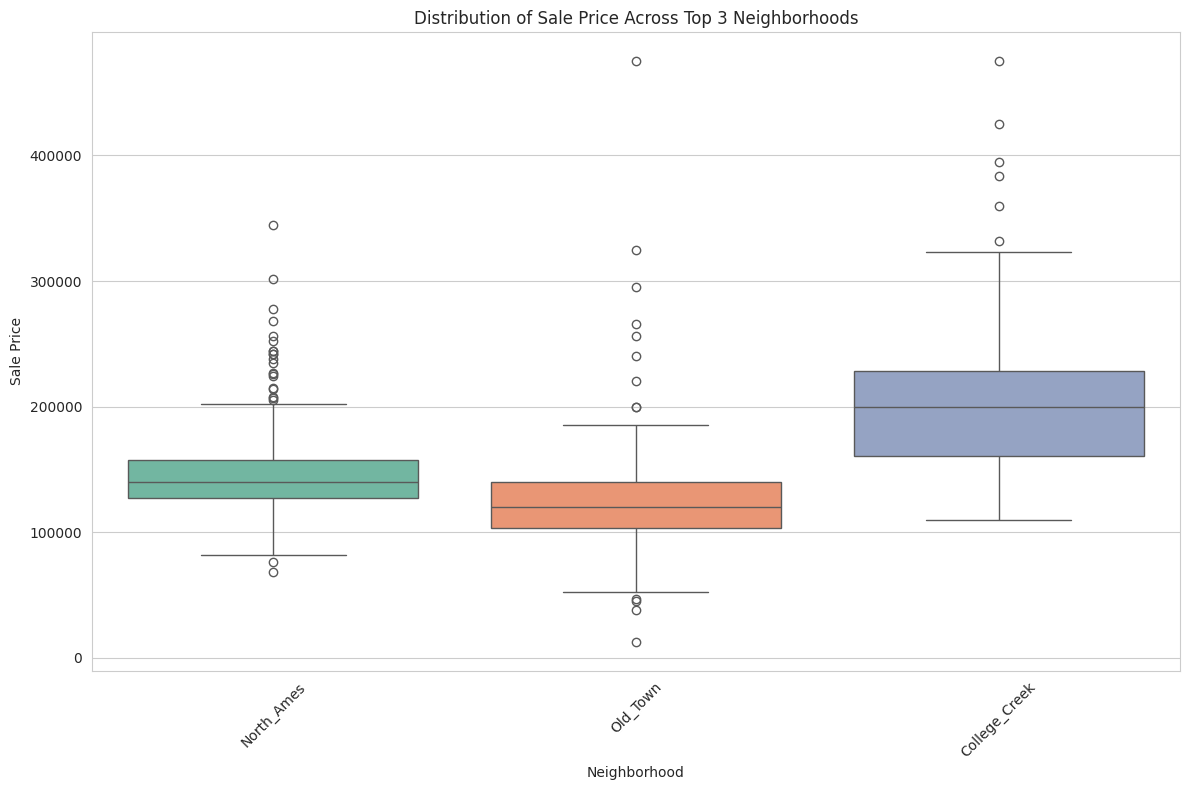

In [ ]:
top_3_neighborhoods = data['Neighborhood'].value_counts().nlargest(3).index

plt.figure(figsize=(12, 8))
sns.boxplot(x='Neighborhood', y='Sale_Price', data=data[data['Neighborhood'].isin(top_3_neighborhoods)], palette='Set2')
plt.title('Distribution of Sale Price Across Top 3 Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

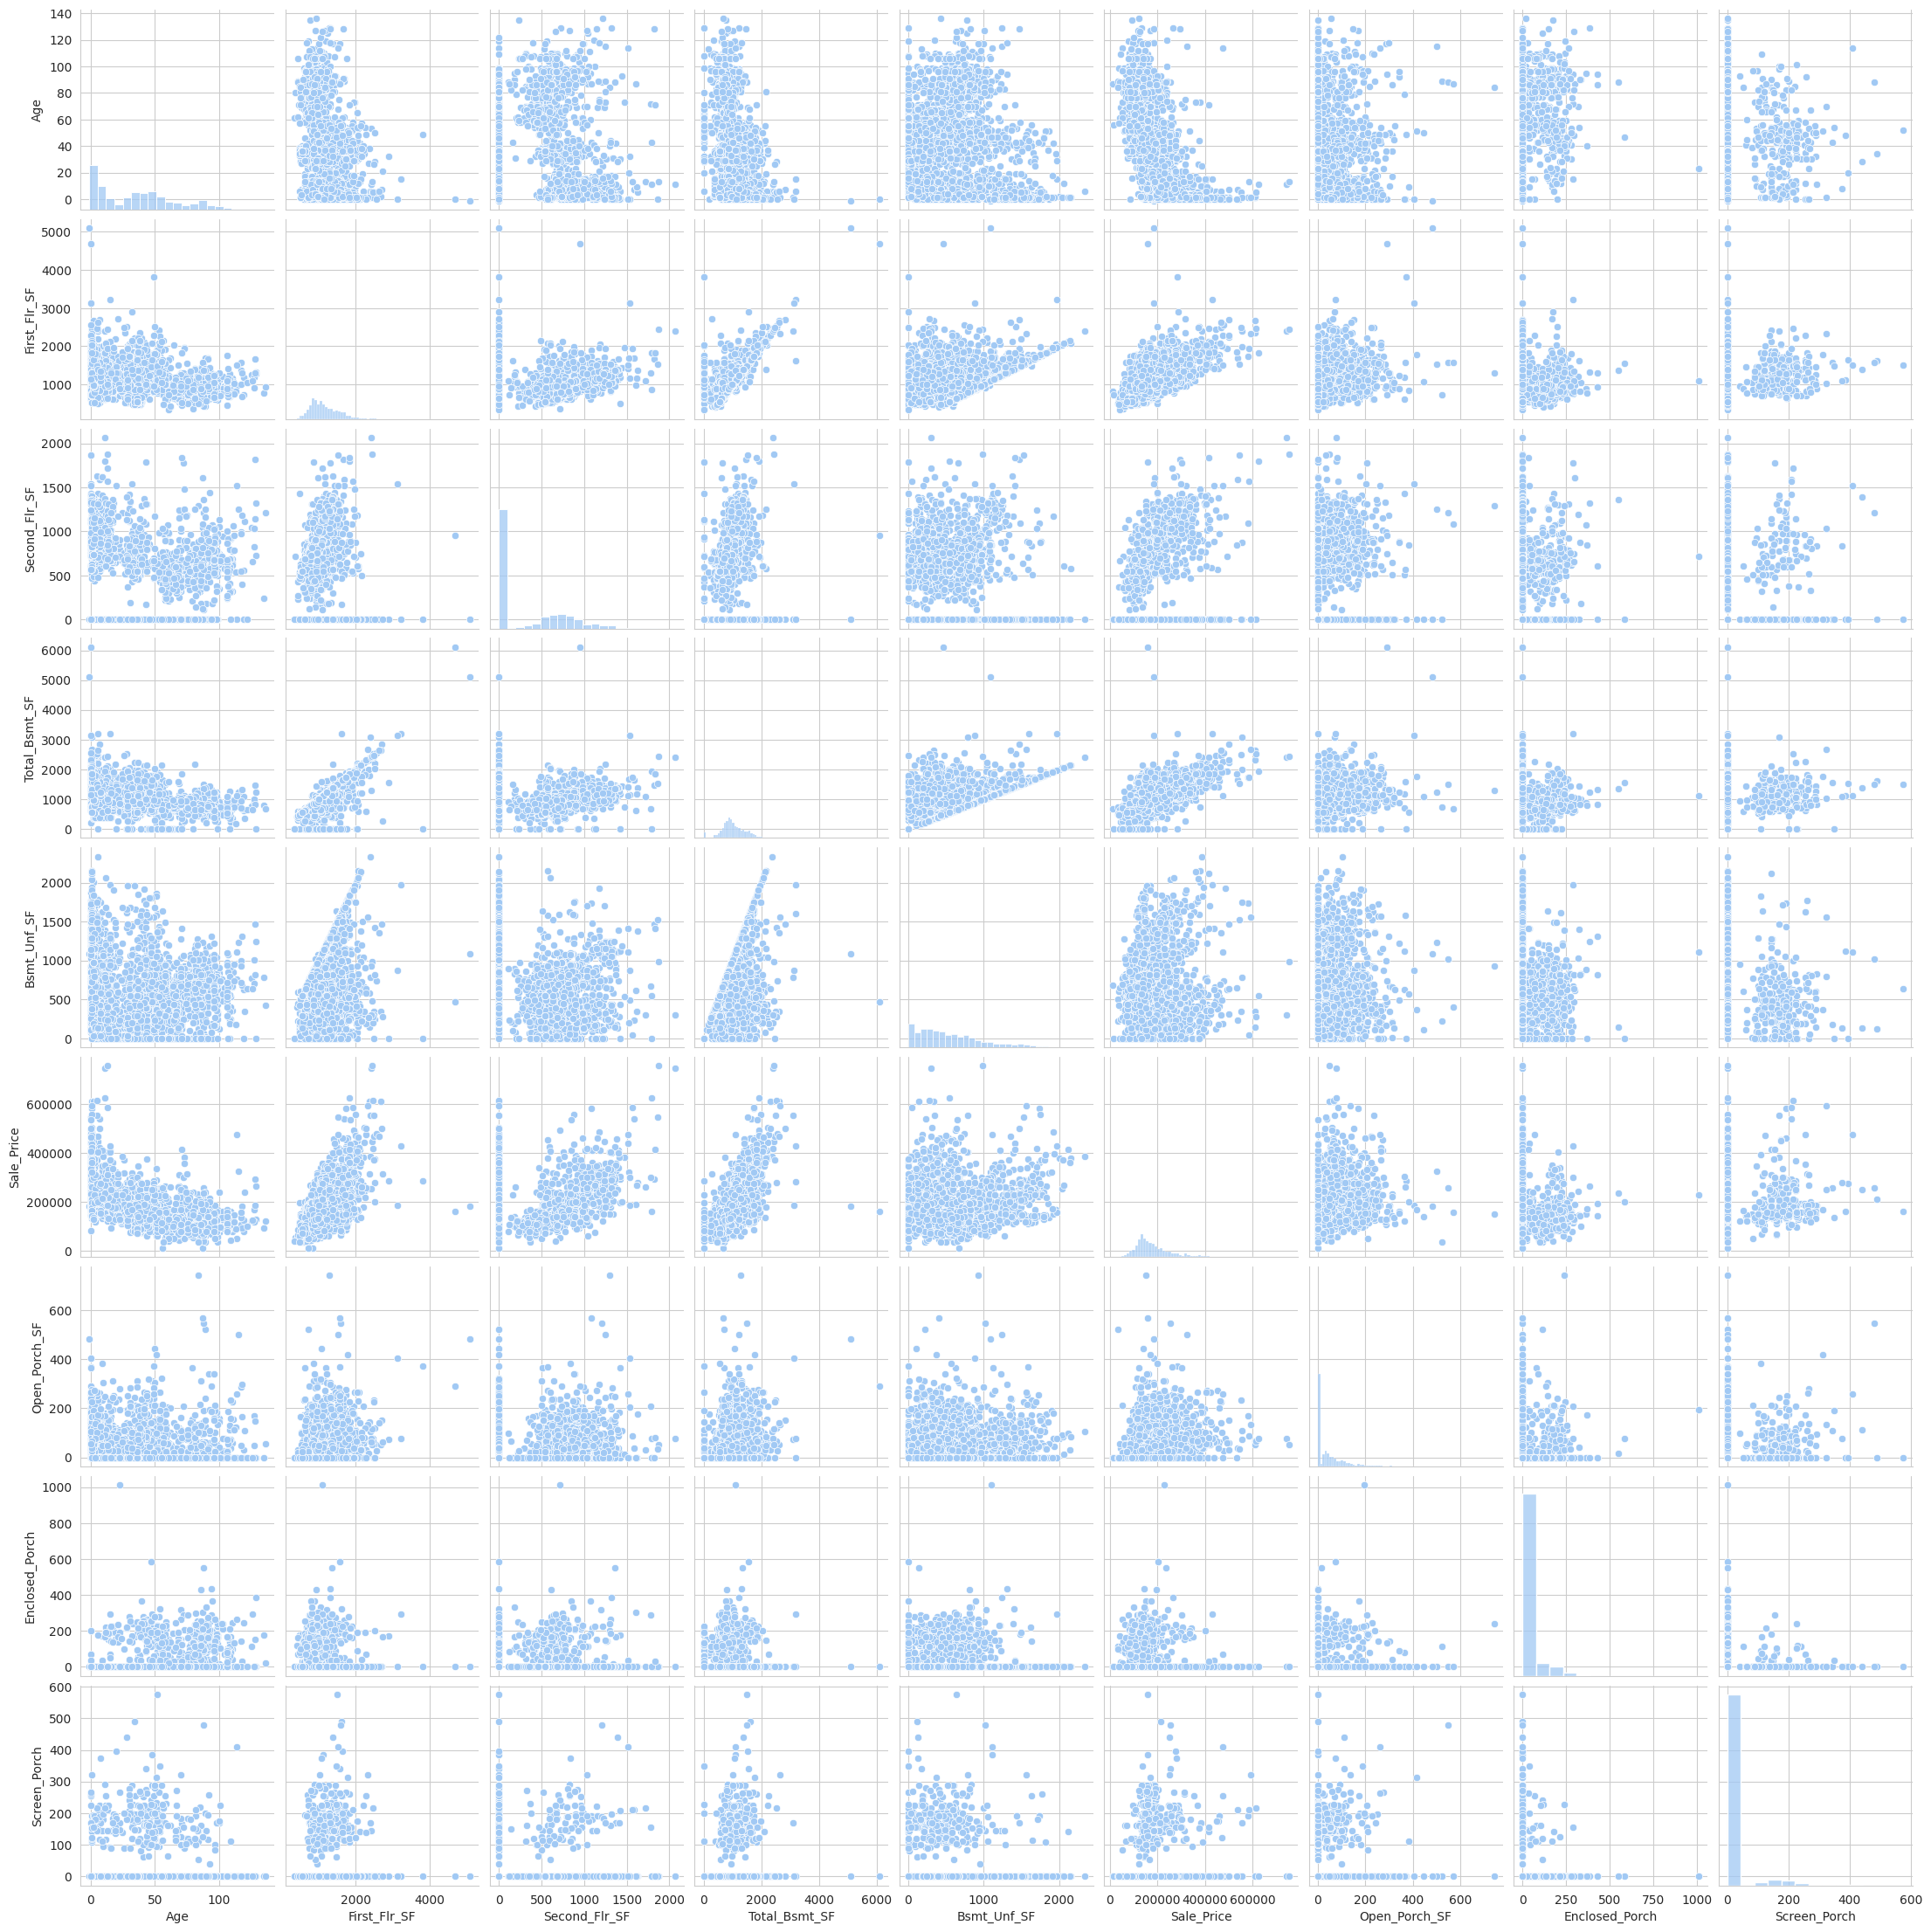

In [ ]:
numerical_features = ["Age", "First_Flr_SF", "Second_Flr_SF", "Total_Bsmt_SF",
                      "Bsmt_Unf_SF", "Sale_Price", "Open_Porch_SF", "Enclosed_Porch",
                      "Screen_Porch"]
numerical_data = data[numerical_features]

sns.pairplot(numerical_data)
plt.show()

# **STEP 2) Data Cleaning**
For data cleaning we want to normalize all out numerical variables and one hot encode all the categorical variables, that would make the dataset accessible for the pipeline since different models have different requirements for the type of the features. 🧹

In [ ]:
data['Age'] = data['Year_Sold'] - data['Year_Built']

xy = data[["Sale_Price", "Age", "Neighborhood",
           "First_Flr_SF", "Second_Flr_SF", "Total_Bsmt_SF", "Bsmt_Unf_SF",
           "House_Style", "Lot_Config", "Open_Porch_SF", "Enclosed_Porch", "Screen_Porch", "Sale_Type"]]



xy = xy.dropna()

X = xy[["Age", "Neighborhood", "First_Flr_SF", "Second_Flr_SF", "Total_Bsmt_SF", "House_Style",
          "Bsmt_Unf_SF", "Lot_Config", "Open_Porch_SF",
          "Enclosed_Porch", "Screen_Porch", "Sale_Type"]]
y = xy["Sale_Price"]


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
categorical_features = ["Neighborhood", "House_Style", "Lot_Config", "Sale_Type"]
numerical_features = ["Age", "First_Flr_SF", "Second_Flr_SF", "Total_Bsmt_SF",
          "Bsmt_Unf_SF", "Open_Porch_SF", "Enclosed_Porch", "Screen_Porch"]

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numerical_features),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

Earlier we did feature engineering as well, we created the "Age" column which is the difference in years between when a house was built and when it was sold. We also created many sub datasets such as most neighborhoods with houses, splitting categorical data, and splitting numerical data!

# **STEP 3) Model Selection**
 Since we saw several linear patterns related to the House Sale Price we thought that starting off with a linear regression could be a good start.

 We also want to implement KNN since it would make sense what houses that have similar characteristics would be priced similarly, we understand the limitation of this method since there are so much more "variables" that go into every house it is very hard even in real life to find a two houses that are very similar and compare their price.

 We also want to implement a Decision Tree sine we would want to have an interpretable result. Decision Trees usually are quite hard to train well so we will try using Random Forrest and a Boosted tree models as well to improve upon the reuslt of the decision tree. 🌴

In [ ]:
#model selection
seed=42
knn = KNN()
lr = LR()
dtr = DTR()
rf = RFR()
xgb = XGBR()

# **STEP 4) Model Training**
 We will use pipeline to connect the 5 different selected models and tune their respective hyperparameters, we will do the process two times so we can have both the RMSE and R^2 metrics. 🔢 💻

In [ ]:
# Pipeline with preprocessor
pipe = Pipeline(steps=[("preprocessor", preprocessor),  ('classifier', 'passthrough')])


seed=42
param_grid = [

    {
        'classifier': [lr],
    },

    {
        'classifier' : [knn],
        'classifier__n_neighbors' : np.arange(1, 25, 2),
        'classifier__weights' : ['uniform', 'distance']
    },

    {
        'classifier': [dtr],
        'classifier__max_depth': [3, 5, 7, 9],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1],
        'classifier__max_features': ['auto', 'sqrt']
    },

    {
        'classifier': [rf],
        'classifier__n_estimators': [100, 200, 500],
        'classifier__max_depth': [4, 8],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1]
    },

    {
        'classifier': [xgb],
        'classifier__n_estimators': [100, 200, 500],
        'classifier__max_depth': [4, 6],
        'classifier__learning_rate': [0.05, 0.1, 0.2],
     }
]

grid_search_r2 = GridSearchCV(pipe, param_grid=param_grid, n_jobs=-1, cv=10, scoring='r2')
grid_fit_r2 = grid_search_r2.fit(X, y)

In [ ]:
# Pipeline with preprocessor
pipe = Pipeline(steps=[("preprocessor", preprocessor),  ('classifier', 'passthrough')])

seed=42

grid_search_rmse = GridSearchCV(pipe, param_grid=param_grid, n_jobs=-1, cv=10, scoring='neg_root_mean_squared_error')
grid_fit_rmse = grid_search_rmse.fit(X, y)

# **STEP 5) Model Evaluation**
 Now we will conduct tables that will show the performance of each model with the best hyperparameter for both R^2 and RMSE metrics. 📈

In [ ]:
cv_results_r2 = grid_search_r2.cv_results_
results_df_r2 = pd.DataFrame(cv_results_r2)

best_indices = {
    'LR': results_df_r2[results_df_r2['param_classifier'].apply(lambda x: isinstance(x, LR))]['mean_test_score'].idxmin(),
    'KNN': results_df_r2[results_df_r2['param_classifier'].apply(lambda x: isinstance(x, KNN))]['mean_test_score'].idxmin(),
    'DTR': results_df_r2[results_df_r2['param_classifier'].apply(lambda x: isinstance(x, DTR))]['mean_test_score'].idxmin(),
    'RF': results_df_r2[results_df_r2['param_classifier'].apply(lambda x: isinstance(x, RFR))]['mean_test_score'].idxmin(),
    'XGB': results_df_r2[results_df_r2['param_classifier'].apply(lambda x: isinstance(x, XGBR))]['mean_test_score'].idxmin()
}

summary_df_r2 = pd.DataFrame(columns=['Model', 'Best Score', 'Best Parameters'])

for model_key, index in best_indices.items():
    best_row = results_df_r2.loc[index]
    summary_df_r2 = pd.concat([summary_df_r2, pd.DataFrame({
        'Model': model_key,
        'Best Score': best_row['mean_test_score'],
        'Best Parameters': best_row['params']
    })], ignore_index=True)

print(summary_df_r2)

   Model  Best Score                                    Best Parameters
0     LR    0.778620                                 LinearRegression()
1    KNN    0.683378                              KNeighborsRegressor()
2    KNN    0.683378                                                  1
3    KNN    0.683378                                            uniform
4    DTR    0.343337                            DecisionTreeRegressor()
5    DTR    0.343337                                                  3
6    DTR    0.343337                                               sqrt
7    DTR    0.343337                                                  1
8    DTR    0.343337                                                  5
9     RF    0.714170                            RandomForestRegressor()
10    RF    0.714170                                                  4
11    RF    0.714170                                                  1
12    RF    0.714170                                            

In [ ]:
cv_results_rmse = grid_search_rmse.cv_results_
results_df_rmse = pd.DataFrame(cv_results_rmse)

best_indices = {
    'LR': results_df_rmse[results_df_rmse['param_classifier'].apply(lambda x: isinstance(x, LR))]['mean_test_score'].idxmin(),
    'KNN': results_df_rmse[results_df_rmse['param_classifier'].apply(lambda x: isinstance(x, KNN))]['mean_test_score'].idxmin(),
    'DTR': results_df_rmse[results_df_rmse['param_classifier'].apply(lambda x: isinstance(x, DTR))]['mean_test_score'].idxmin(),
    'RF': results_df_rmse[results_df_rmse['param_classifier'].apply(lambda x: isinstance(x, RFR))]['mean_test_score'].idxmin(),
    'XGB': results_df_rmse[results_df_rmse['param_classifier'].apply(lambda x: isinstance(x, XGBR))]['mean_test_score'].idxmin()
}

summary_df_rmse = pd.DataFrame(columns=['Model', 'Best Score', 'Best Parameters'])

for model_key, index in best_indices.items():
    best_row = results_df_rmse.loc[index]
    summary_df_rmse = pd.concat([summary_df_rmse, pd.DataFrame({
        'Model': model_key,
        'Best Score': best_row['mean_test_score'],
        'Best Parameters': best_row['params']
    })], ignore_index=True)

print(summary_df_rmse)

   Model    Best Score                                    Best Parameters
0     LR -35188.652838                                 LinearRegression()
1    KNN -41265.245881                              KNeighborsRegressor()
2    KNN -41265.245881                                                  1
3    KNN -41265.245881                                            uniform
4    DTR -64543.784597                            DecisionTreeRegressor()
5    DTR -64543.784597                                                  3
6    DTR -64543.784597                                               sqrt
7    DTR -64543.784597                                                  1
8    DTR -64543.784597                                                  5
9     RF -39708.777426                            RandomForestRegressor()
10    RF -39708.777426                                                  4
11    RF -39708.777426                                                  1
12    RF -39708.777426                

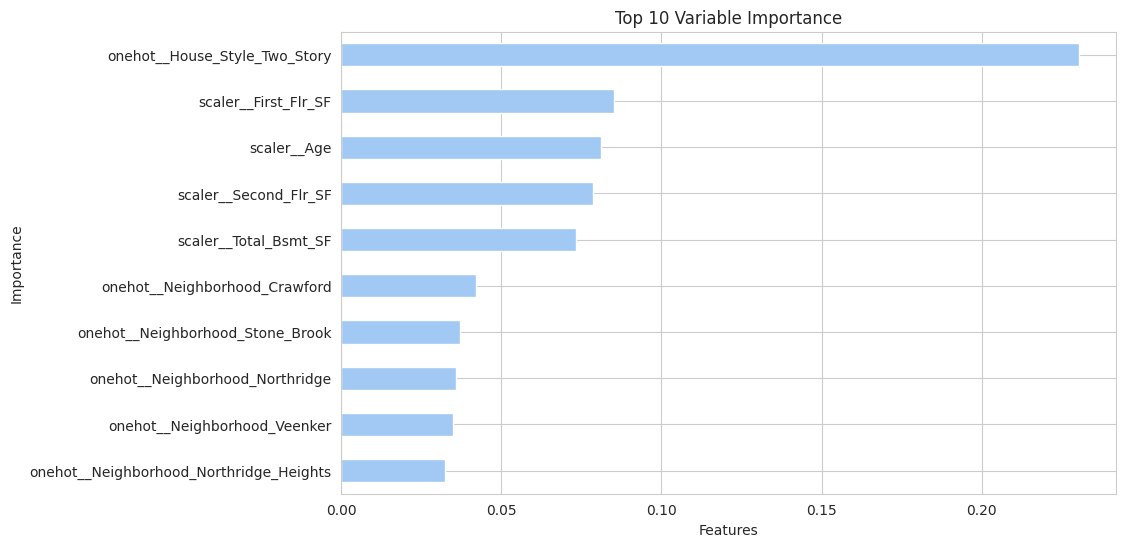

In [ ]:
import matplotlib.pyplot as plt

X_processed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=0)

model = XGBR(
    learning_rate=0.2,
    n_estimators=500,
    max_depth=4,
    random_state=42
)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_

feature_names = preprocessor.get_feature_names_out()

importance = pd.Series(feature_importances, index=feature_names)

top10 = importance.sort_values(ascending=False).head(10)[::-1]
plt.figure(figsize=(10, 6))
top10.plot(kind='barh')
plt.title('Top 10 Variable Importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

Our best model is XGB with RMSE of 31108.93. This means that on average, the model's predictions for sale prices deviate from the actual sale prices by approximately $31,108.93 which is quite good given our mean for sales is 180,000 and our IQR is 130,000 to 213,000! We think this is a good result as housing prices are generally unpredicatable and when we take into account the mean, SD, and range of our sale variable- our RMSE is doing well!

Our R^2 value of 0.822322 means that approximately 82.23% of the variance in the sale prices can be explained by the features included in the model.

Meaning, our model accounts for 82.23% of the variability observed in the sale prices of the houses in the dataset which is an excellent portion to capture!

Additionally, we can see that the most important feature the defined house price was the presence of a second floor. Other important features were square foot area of first floor, age of the house, square foot are of second floor and square foot area of basement in order of importance.

# **Conclusion**

In conclusion, we have learned a lot about the importance of planning a detailed workflow. It guided every step of implementing our model! More specifically we have discovered a lot about housing information (specifically in Iowa!) and how certain house features influence the price, and others might intuitively feel like leverage features in a house but turn out not to be influential at all!

We have also learned a lot about the importance of parameter tuning, and how to set up our code to have the best evaluation metrics possible.

Thank you! 🏡